In [1]:
#importing all the required libraries 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#reading the data set of application data
application=pd.read_csv("application_data.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#checking the shape of dataset
application.shape

(307511, 122)

In [4]:
#checking the info of application data
application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
#to clean the missing data
#listing the columns having more than 40% missing values
null_col=application.isnull().sum()
null_col=null_col[null_col.values>0.4*len(null_col)]
len(null_col)


64

In [6]:
#removing all those 64 columns
null_col=list(null_col[null_col.values>0.4*len(null_col)].index)

application.drop(labels=null_col, axis=1, inplace=True)
application.shape

(307511, 58)

In [7]:
#listing the rows having more than 50% missing values
null_row=application.isnull().sum(axis=1)
null_row=list(null_row[null_row.values>0.5*len(null_row)])
len(null_row)

0

In [8]:
#to check missing values in the remaining columns 
application.isna().sum().sort_values(ascending=False)


AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
SK_ID_CURR                      0
FLAG_DOCUMENT_7                 0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_5                 0
FLAG_DOCUMENT_6                 0
FLAG_DOCUMENT_8                 0
REG_REGION_NOT_LIVE_REGION      0
FLAG_DOCUMENT_9                 0
FLAG_DOCUMENT_10                0
FLAG_DOCUMENT_11                0
FLAG_DOCUMENT_12                0
FLAG_DOCUMENT_13                0
FLAG_DOCUMENT_14                0
FLAG_DOCUMENT_15                0
FLAG_DOCUMENT_16                0
FLAG_DOCUMENT_17                0
FLAG_DOCUMENT_18                0
FLAG_DOCUMENT_19                0
FLAG_DOCUMENT_20                0
REG_REGION_NOT

In [9]:
#listing all those columns which are not necessary for our analysis
not_necessary=["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE","FLAG_EMAIL", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "DAYS_LAST_PHONE_CHANGE", "REGION_RATING_CLIENT_W_CITY", "REGION_POPULATION_RELATIVE"]
len(not_necessary)

31

In [10]:
#dropping those columns
application.drop(columns=not_necessary, axis=1, inplace=True)
application.shape

(307511, 27)

In [11]:
#cross checking how many columns are left with null values
application.isna().sum().sort_values(ascending=False)


AMT_ANNUITY                    12
SK_ID_CURR                      0
DAYS_BIRTH                      0
LIVE_CITY_NOT_WORK_CITY         0
REG_CITY_NOT_WORK_CITY          0
REG_CITY_NOT_LIVE_CITY          0
LIVE_REGION_NOT_WORK_REGION     0
REG_REGION_NOT_WORK_REGION      0
REG_REGION_NOT_LIVE_REGION      0
HOUR_APPR_PROCESS_START         0
WEEKDAY_APPR_PROCESS_START      0
DAYS_ID_PUBLISH                 0
DAYS_REGISTRATION               0
DAYS_EMPLOYED                   0
NAME_HOUSING_TYPE               0
TARGET                          0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
AMT_CREDIT                      0
AMT_INCOME_TOTAL                0
CNT_CHILDREN                    0
FLAG_OWN_REALTY                 0
FLAG_OWN_CAR                    0
CODE_GENDER                     0
NAME_CONTRACT_TYPE              0
ORGANIZATION_TYPE               0
dtype: int64

since AMT_ANNUITY has 12 missing values which is relatively less so we can immute that using the median value.


In [12]:
#checking the median value forAMT_ANNUITY
application['AMT_ANNUITY'].median()

24903.0

In [13]:
#applying the same median value inplace in null value
#cross checked if any null value is left
application.loc[application["AMT_ANNUITY"].isnull(), "AMT_ANNUITY"]=24903.0
application["AMT_ANNUITY"].isnull().sum()

0

In [14]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [15]:
#cross checking if any columns are left with null values
application.isna().sum().sort_values(ascending=False)

SK_ID_CURR                     0
DAYS_BIRTH                     0
LIVE_CITY_NOT_WORK_CITY        0
REG_CITY_NOT_WORK_CITY         0
REG_CITY_NOT_LIVE_CITY         0
LIVE_REGION_NOT_WORK_REGION    0
REG_REGION_NOT_WORK_REGION     0
REG_REGION_NOT_LIVE_REGION     0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
NAME_HOUSING_TYPE              0
TARGET                         0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_ANNUITY                    0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_CONTRACT_TYPE             0
ORGANIZATION_TYPE              0
dtype: int64

In [16]:
#describing the column gender to see how many males and females are present 
application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

we found that there are 4 rows having "XNA", since females are in majority we can update those 4 rows with "F", as there wont be much impact on the dataset.

In [17]:
#updating the dataset
application.loc[application["CODE_GENDER"]=="XNA", "CODE_GENDER"]="F"
application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [18]:
#describing the column organization type
application.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

we found that in organization type 55374 rows have XNA value so lets check how much percentage it accounts for 

In [19]:
#checking percentage
application.ORGANIZATION_TYPE.value_counts()/len(application)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

since XNA accounts for 18% , hence dropping will not cause much impact

In [20]:
#updating the dataset
application=application.drop(application.loc[application["ORGANIZATION_TYPE"]=="XNA"].index)
application[application["ORGANIZATION_TYPE"]=="XNA"].shape

(0, 27)

In [21]:
application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         226224
Revolving loans     25913
Name: NAME_CONTRACT_TYPE, dtype: int64

In [22]:
#casting the variables into numeric 
num_col=['SK_ID_CURR', 'TARGET',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY','DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       ]
application[num_col]=application[num_col].apply(pd.to_numeric)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [23]:
#describing the total income

#application.AMT_INCOME_TOTAL.plot.box()
print(application.AMT_INCOME_TOTAL.describe())
print(application.AMT_INCOME_TOTAL.max())
#plt.show()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
117000000.0


In [24]:
#inorder to organize the data in a readeable manner we create bins 

bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots=["0-25000","25000-50000", "50000-75000","75000-100000", "100000-125000","125000-150000", "150000-175000","175000-200000","200000-225000","225000-250000", "250000-275000", "275000-300000", "300000-325000", "325000-350000","350000-375000","375000-400000","400000-425000","425000-450000", "450000-475000", "475000-500000", "500000-above"]
application["AMT_INCOME_RANGE"]=pd.cut(application["AMT_INCOME_TOTAL"],bins, labels=slots)
#len(bins)

In [25]:
#describing credit amount 
#application.AMT_CREDIT.plot.box()
print(application.AMT_CREDIT.describe())
print(application.AMT_CREDIT.min())
print(application.AMT_CREDIT.max())
#plt.show()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
45000.0
4050000.0


In [26]:
#inorder to organize the data in a readeable manner we create bins 
bins=[0,100000,250000,500000,700000,1000000,1500000,2000000,3000000,4000000,1000000000000]
labels_2=["0-100000","100000-250000", "250000-500000", "500000-700000", "700000-1000000", "1000000-1500000", "1500000-2000000", "2000000-3000000", "300000-4000000", "4000000-above"]
application["AMT_CREDIT_RANGE"]=pd.cut(application["AMT_CREDIT"],bins, labels=labels_2)


now we shall divide the dataset as per the target
target=1 (clients who are having payment difficulties)
target=0 (all other apart from target=1)


In [27]:
#we create new data set according to target 0 and 1
TARGET_0=application.loc[application.TARGET==0]
TARGET_1=application.loc[application.TARGET==1]

In [28]:
#to calculate imbalance 
round(len(TARGET_0)/len(TARGET_1),2)

10.55

The imbalance ration is 10.55

univarient analysis for application data 

classified few categorical columns into graphs to get better understanding 

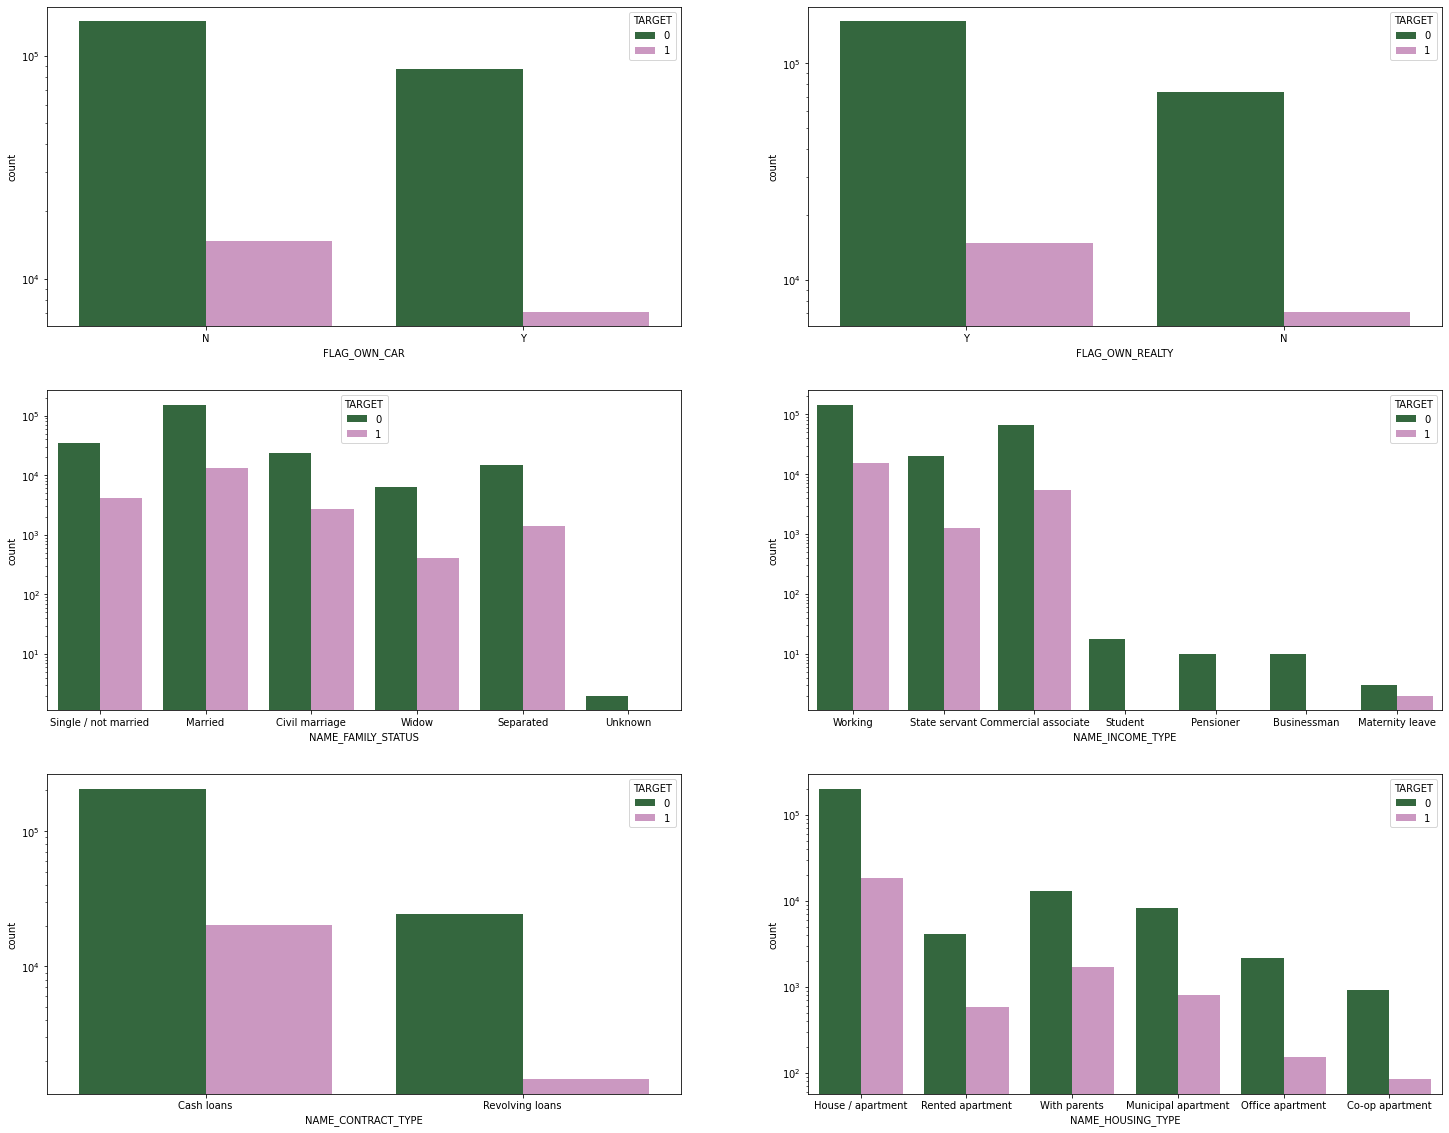

In [29]:
#comparing the categorical columns againts targets 
category_cols=["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_CONTRACT_TYPE", "NAME_HOUSING_TYPE"]
plt.figure(figsize=(25,20))
for i in (enumerate(category_cols)):
    plt.subplot(len(category_cols)//2,2,i[0]+1)
    sns.countplot(x=i[1], hue="TARGET", data=application, palette="cubehelix")
    plt.yscale("log")
plt.show()

analysis of numerical variables


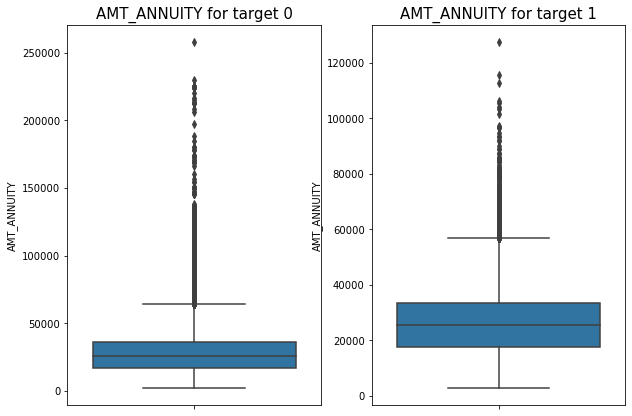

In [30]:
#outliners for amt_annuity
plt.figure(figsize=(10,7))
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.subplot(1,2,1)
plt.title("AMT_ANNUITY for target 0", size=15)
sns.boxplot(data=TARGET_0, y="AMT_ANNUITY")
plt.subplot(1,2,2)
plt.title("AMT_ANNUITY for target 1", size=15)
sns.boxplot(data=TARGET_1, y="AMT_ANNUITY")
plt.show()

both have outliners, quantile for target 1 is bigger

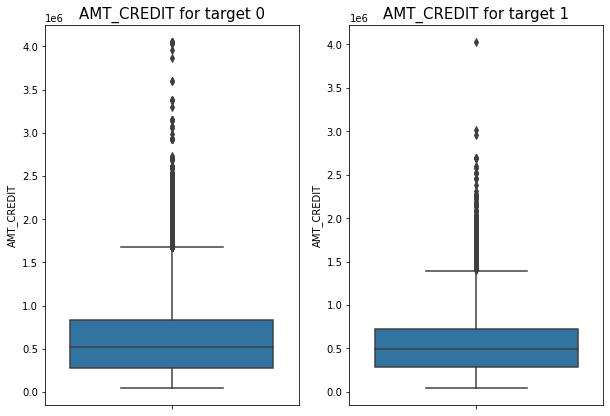

In [31]:
#outliners for amt_credit
plt.figure(figsize=(10,7))
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.subplot(1,2,1)
plt.title("AMT_CREDIT for target 0", size=15)
sns.boxplot(data=TARGET_0, y="AMT_CREDIT")
plt.subplot(1,2,2)
plt.title("AMT_CREDIT for target 1", size=15)
sns.boxplot(data=TARGET_1, y="AMT_CREDIT")
plt.show()

both have outliners, quantile for target 0 is bigger

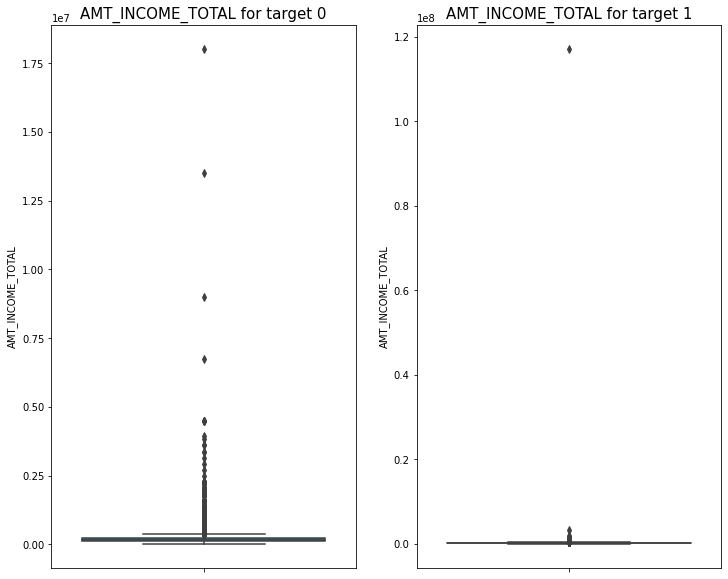

In [32]:
#outliners for amt_income_total
plt.figure(figsize=(12,10))
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.subplot(1,2,1)
plt.title("AMT_INCOME_TOTAL for target 0", size=15)
sns.boxplot(data=TARGET_0, y="AMT_INCOME_TOTAL")
plt.subplot(1,2,2)
plt.title("AMT_INCOME_TOTAL for target 1", size=15)
sns.boxplot(data=TARGET_1, y="AMT_INCOME_TOTAL")
plt.show()

outliners in target 1 are very less.

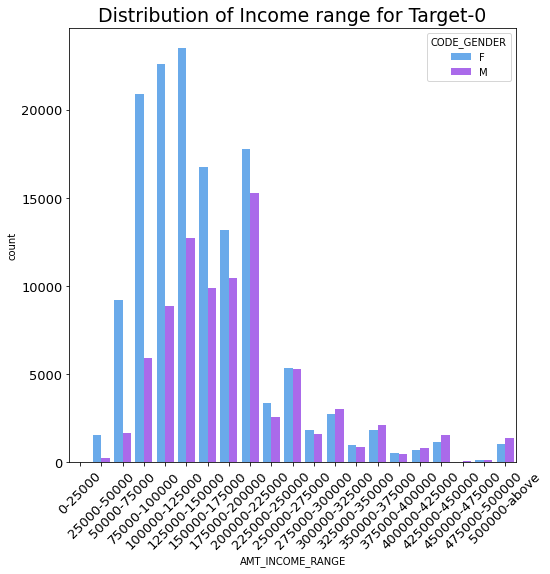

In [33]:
#for target 0
#Distribution of Income range
plt.figure(figsize=(8,8))

plt.title("Distribution of Income range for Target-0", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)

sns.countplot(data=TARGET_0, x="AMT_INCOME_RANGE",hue="CODE_GENDER", palette="cool")

plt.show()

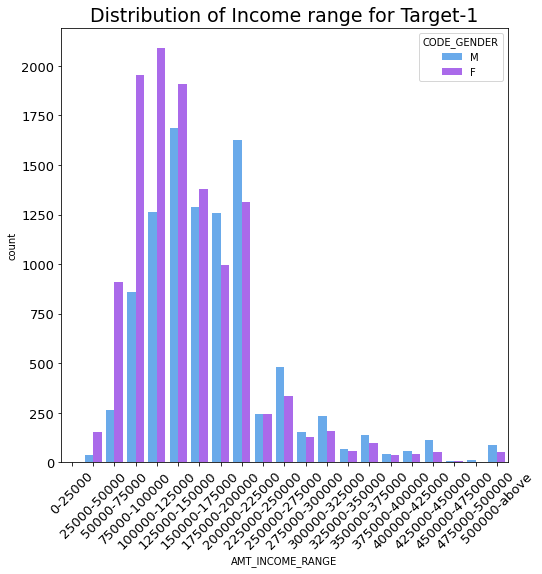

In [34]:
#for target 1
#Distribution of Income range
plt.figure(figsize=(8,8))

plt.title("Distribution of Income range for Target-1", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)

sns.countplot(data=TARGET_1, x="AMT_INCOME_RANGE",hue="CODE_GENDER", palette="cool")

plt.show()

more credits are taken by people having an income of range 75000-200000 and female count is more than male

Distribution of organization type for target 0 and 1 

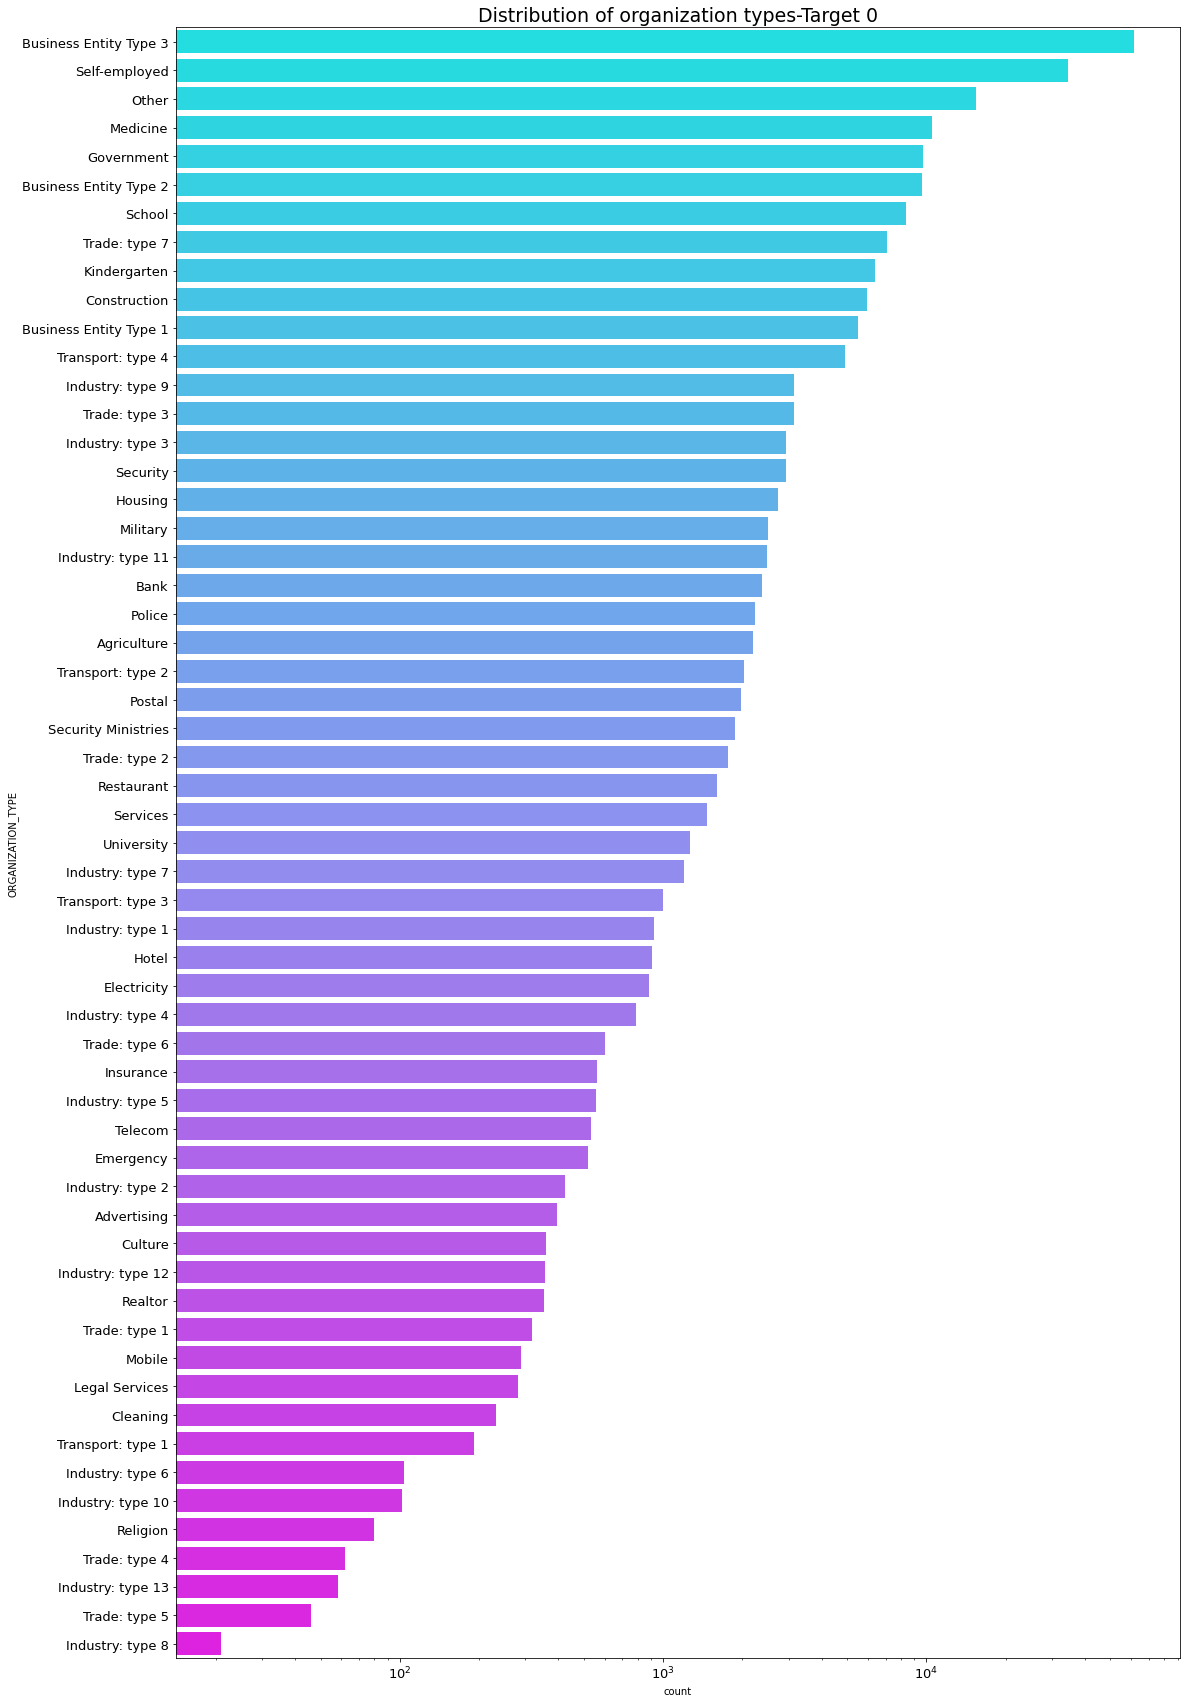

In [35]:
#for target 0
#to check the distribution of organization type for target 0 
plt.figure(figsize=(18,30))

plt.title("Distribution of organization types-Target 0", size=19)
plt.xticks(size=13)
plt.yticks(size=13)
plt.xscale("log")
sns.countplot(data=TARGET_0, y="ORGANIZATION_TYPE",order=TARGET_0["ORGANIZATION_TYPE"].value_counts().index, palette="cool")
plt.show()

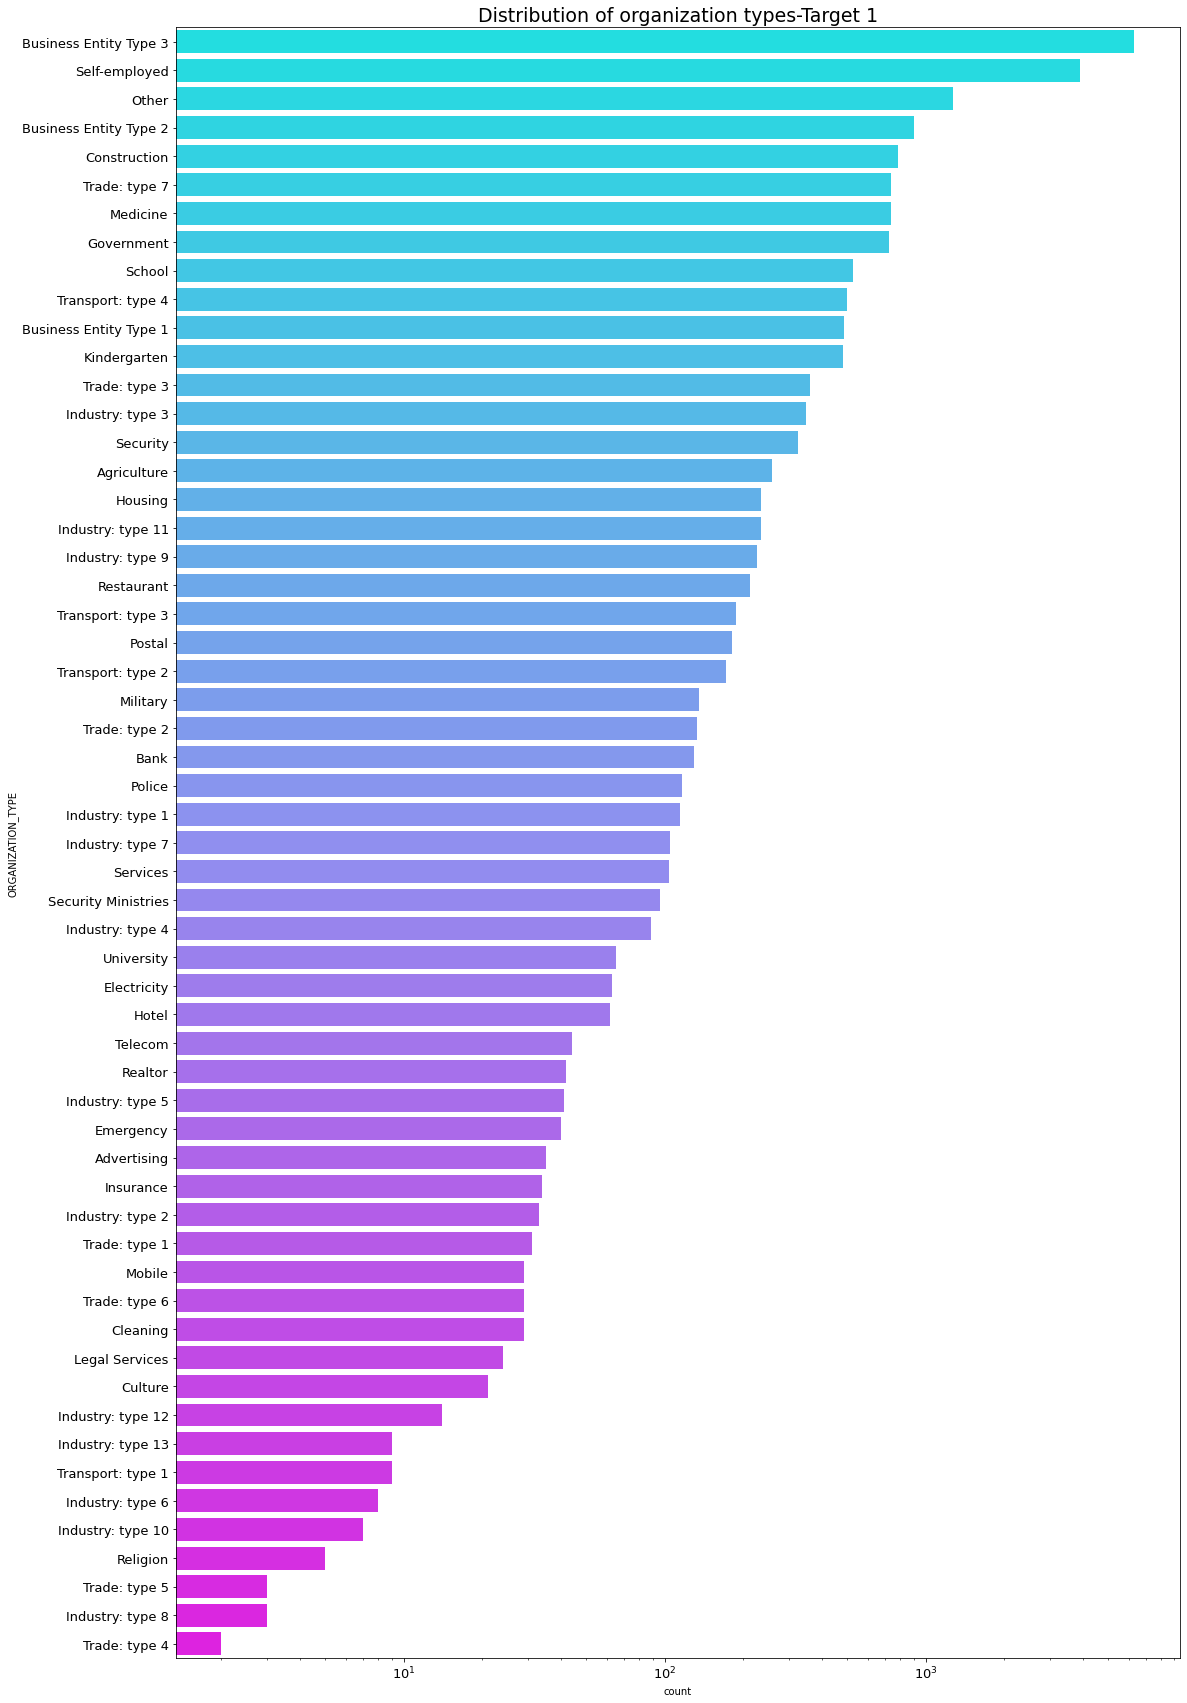

In [36]:
#for target 1
#to check the distribution of organization type for target 1
plt.figure(figsize=(18,30))

plt.title("Distribution of organization types-Target 1", size=19)
plt.xticks(size=13)
plt.yticks(size=13)
plt.xscale("log")
sns.countplot(data=TARGET_1, y="ORGANIZATION_TYPE",order=TARGET_1["ORGANIZATION_TYPE"].value_counts().index, palette="cool")
plt.show()

points to be considered
1.clients who have applied for credit are mostly from buisness entity type-3, self employed , and other
2.clients who have applied least are Trade type-4, industry type-8, trade type-5
3.distribution is similar in both of target 0 and 1

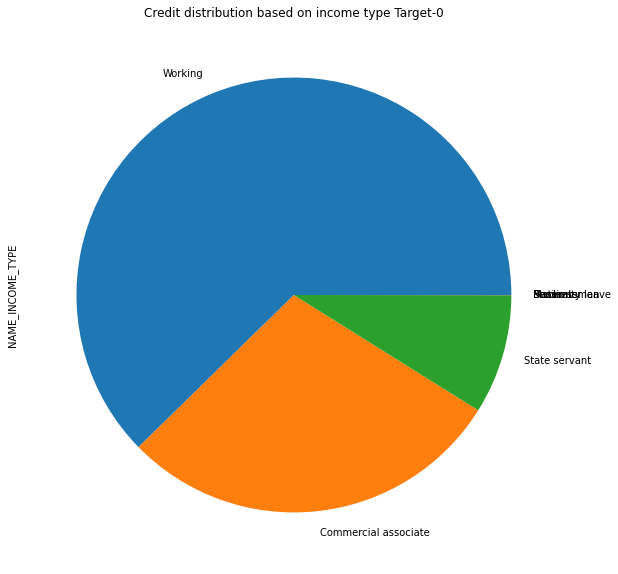

In [37]:
#for target 0
plt.figure(figsize=(10,10))
TARGET_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie()
plt.title("Credit distribution based on income type Target-0")
plt.show()

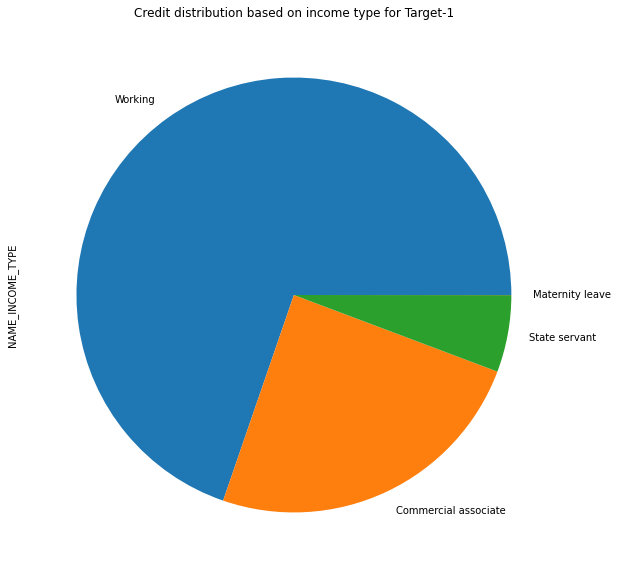

In [38]:
#for target 1
plt.figure(figsize=(10,10))
TARGET_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie()
plt.title("Credit distribution based on income type for Target-1")
plt.show()

It is very clear that,income type "working" are the ones who have high higher credits followed by commerical assossiates and state servents, maternity leave has the least.


Bi-variate analysis 

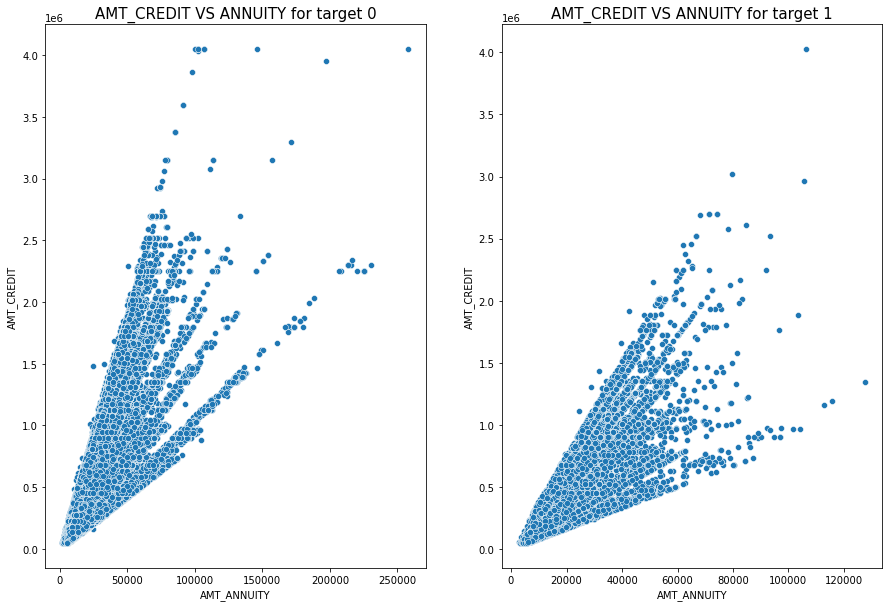

In [39]:
#for target 0 and 1
#credit vs annuity
plt.figure(figsize=(15,10))
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.subplot(1,2,1)
plt.title("AMT_CREDIT VS ANNUITY for target 0", size=15)
sns.scatterplot(data=TARGET_0, y="AMT_CREDIT", x="AMT_ANNUITY")
plt.subplot(1,2,2)
plt.title("AMT_CREDIT VS ANNUITY for target 1", size=15)
sns.scatterplot(data=TARGET_1, y="AMT_CREDIT", x="AMT_ANNUITY")
plt.show()

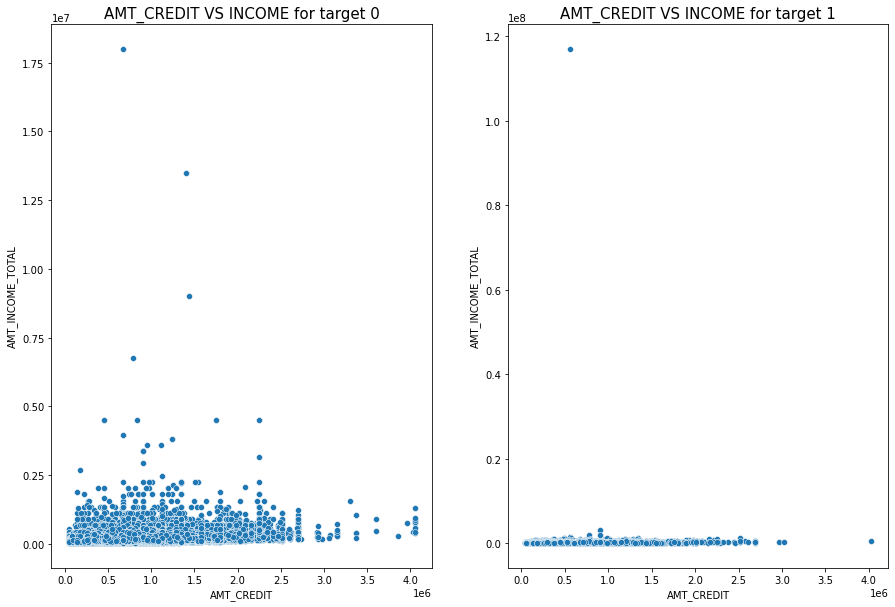

In [40]:
#for target 0 and 1
#credit vs annuity
plt.figure(figsize=(15,10))
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.subplot(1,2,1)
plt.title("AMT_CREDIT VS INCOME for target 0", size=15)
sns.scatterplot(data=TARGET_0, x="AMT_CREDIT", y="AMT_INCOME_TOTAL")
plt.subplot(1,2,2)
plt.title("AMT_CREDIT VS INCOME for target 1", size=15)
sns.scatterplot(data=TARGET_1, x="AMT_CREDIT", y="AMT_INCOME_TOTAL")
plt.show()

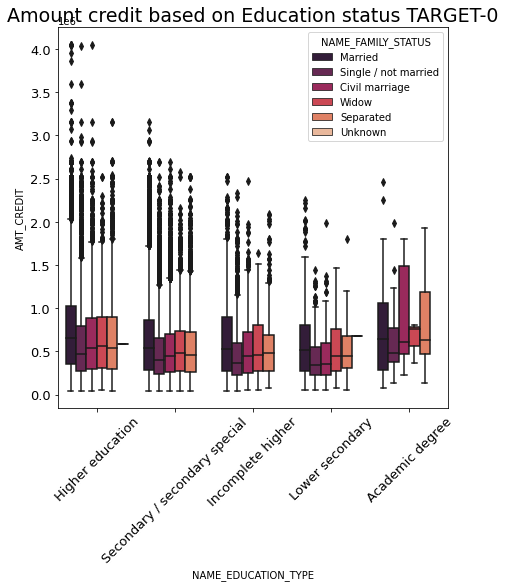

In [41]:
#for target 0
#amt_credit vs education status 

plt.figure(figsize=(7,7))

plt.title("Amount credit based on Education status TARGET-0", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)

sns.boxplot(data=TARGET_0, y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",hue="NAME_FAMILY_STATUS", palette="rocket")
plt.show()

we can infer that married, civil-marriage and separted pf academic degree are the one who have higher number of credit.
higher eduaction has more outliners
single and widows are the ones with less credits 

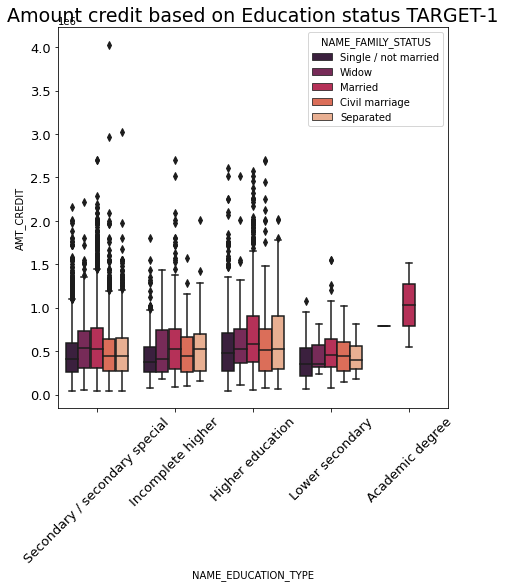

In [42]:
#for target 1
#amt_credit vs education status
plt.figure(figsize=(7,7))

plt.title("Amount credit based on Education status TARGET-1", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)

sns.boxplot(data=TARGET_1, y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",hue="NAME_FAMILY_STATUS", palette="rocket")
plt.show()

we can infer that married, of academic degree are the ones who have higher number of credits.
higher eduaction has more outliners. 


Total income vs Education status 

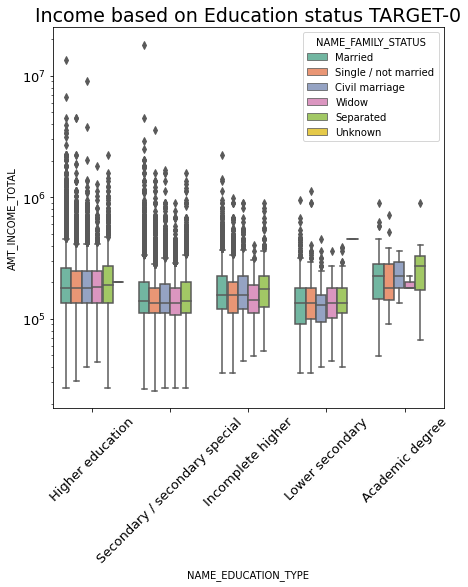

In [43]:
#for target 0
#Total income vs education status 

plt.figure(figsize=(7,7))

plt.title("Income based on Education status TARGET-0", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.yscale("log")
sns.boxplot(data=TARGET_0, y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE",hue="NAME_FAMILY_STATUS", palette="Set2")
plt.show()

Income of higher education is more and is almost same for all family status, higher and secondary have more outliners. although the outliners for academic is less but the income is relatively higher.
lower secondary and incomlete higher has less income.


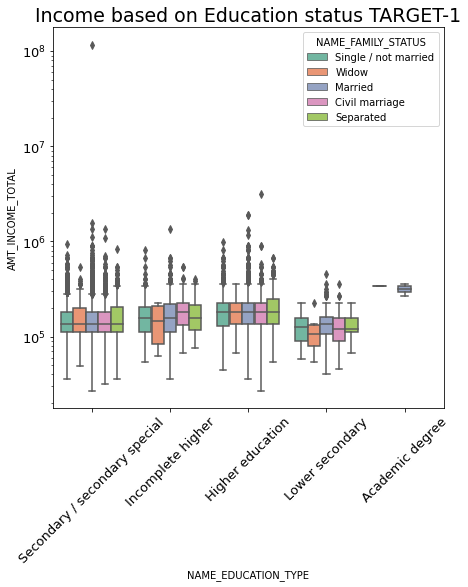

In [44]:
#for target 1
#Total income vs education status 

plt.figure(figsize=(7,7))

plt.title("Income based on Education status TARGET-1", size=19)
plt.xticks(size=13, rotation=45)
plt.yticks(size=13)
plt.yscale("log")
sns.boxplot(data=TARGET_1, y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE",hue="NAME_FAMILY_STATUS", palette="Set2")
plt.show()

correlation for numeric columns of both target-0 and target-1

In [45]:
#correlation for target 1 and 0
TARGET_CORR_0=TARGET_0.iloc[0:,2:]
TARGET_CORR_1=TARGET_1.iloc[0:,2:]
TARGET_CORR_0=TARGET_CORR_0.corr()
TARGET_CORR_1=TARGET_CORR_1.corr()

In [46]:
#for target 0
TARGET_CORR_0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,0.242462,0.063036,0.162900,-0.117746,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,-0.045543,-0.030102,0.034508,-0.026462,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,-0.152659,-0.087500,-0.015180,-0.034914,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,-0.091571,-0.052470,0.009814,-0.025990,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,1.000000,0.352662,0.299000,0.108050,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,0.352662,1.000000,0.172102,0.086679,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,0.299000,0.172102,1.000000,0.029895,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,0.108050,0.086679,0.029895,1.000000,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767
HOUR_APPR_PROCESS_START,-0.033031,0.055934,0.040390,0.034038,0.048619,0.022200,-0.031501,0.005436,1.000000,0.055041,0.072118,0.057690,0.010767,-0.001460,-0.005077
REG_REGION_NOT_LIVE_REGION,-0.023033,0.064868,0.020979,0.039753,0.058344,0.056714,0.020549,0.026744,0.055041,1.000000,0.461596,0.090193,0.342321,0.142429,0.003479


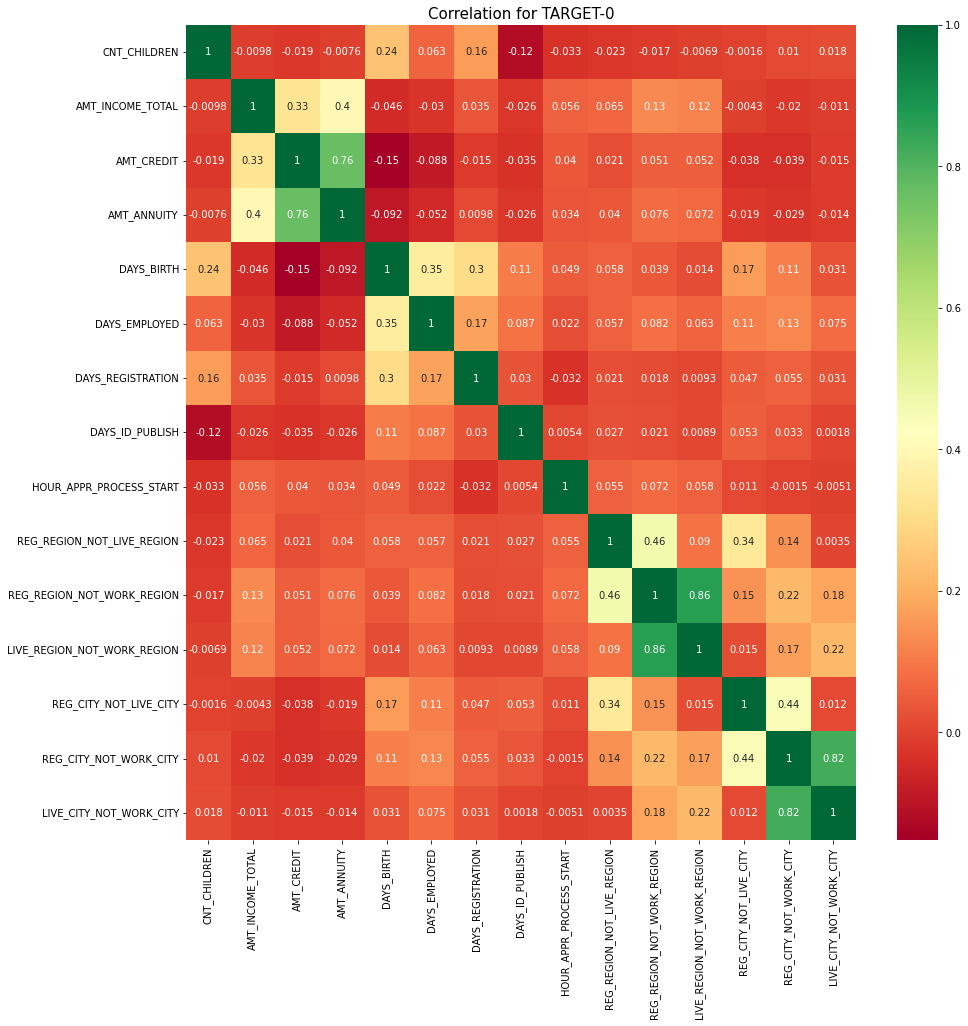

In [47]:
#plotting heatmap for finding correlation of non defaulters ie target-0
plt.figure(figsize=(15,15))
sns.heatmap(TARGET_CORR_0, cmap="RdYlGn",annot=True)
plt.title("Correlation for TARGET-0", size=15)
plt.show()

1)We can infer that as age increases amount credit decreases and vice versa
2)Annuity and credit have linear relation both are directly proportional.
3)Income decrease as no of children increase and vice versa , both are inversely proportional.
4)Similar obervations were found for Target 0


In [48]:
#for target 1
TARGET_CORR_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,0.176563,0.032627,0.126411,-0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,-0.007822,-0.000039,-0.003959,-0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,-0.189512,-0.106003,-0.033250,-0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,-0.090497,-0.049032,0.014302,-0.044289,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,1.000000,0.307018,0.241202,0.135519,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,0.307018,1.000000,0.137454,0.096559,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,0.241202,0.137454,1.000000,0.049891,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,0.135519,0.096559,0.049891,1.000000,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871
HOUR_APPR_PROCESS_START,-0.038923,0.012520,0.029054,0.022524,0.034990,0.000092,-0.048209,0.008774,1.000000,0.054819,0.067472,0.051844,0.005148,0.005293,0.003297
REG_REGION_NOT_LIVE_REGION,-0.032465,0.006951,0.020083,0.033311,0.044508,0.059212,0.010866,0.025320,0.054819,1.000000,0.506747,0.068368,0.322030,0.150968,-0.013946


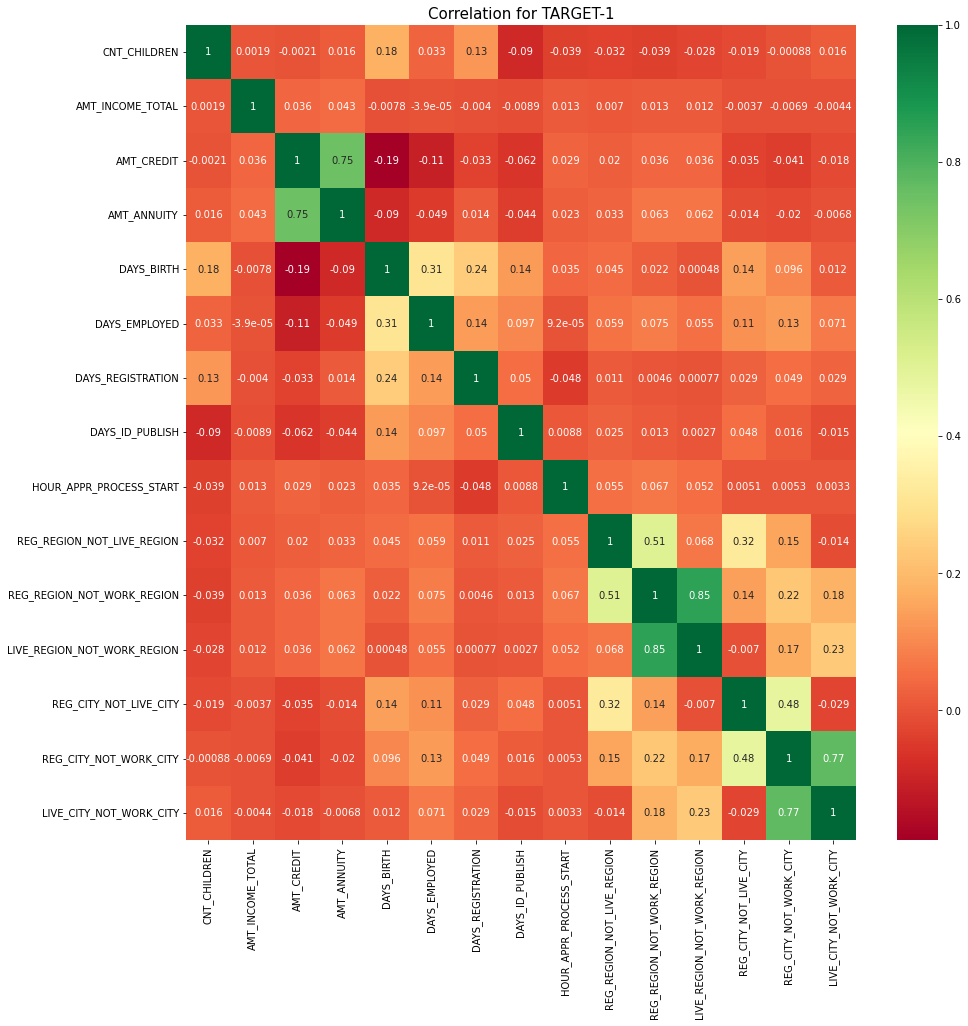

In [49]:
#plotting heatmap for finding correlation of non defaulters ie target-1
plt.figure(figsize=(15,15))
sns.heatmap(TARGET_CORR_1, cmap="RdYlGn",annot=True)
plt.title("Correlation for TARGET-1", size=15)
plt.show()

Analysis for Previous_application

In [50]:
#read the data set of previous application
prev_app=pd.read_csv("previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#checking the shape of previous application data
prev_app.shape

(1670214, 37)

In [52]:
#checking the info of previous application data
prev_app.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
#to check the no of null/missing columns
null_col_prev=prev_app.isnull().sum()
null_col_prev=null_col_prev[null_col_prev.values>0.4*len(null_col_prev)]
len(null_col_prev)

15

In [54]:
#to clean the null/missing values
null_col_prev=list(null_col_prev[null_col_prev.values>0.4*len(null_col_prev)].index)

prev_app.drop(labels=null_col_prev, axis=1, inplace=True)
prev_app.shape

(1670214, 22)

In [55]:
#to check the no of null/missing rows
null_row_prev=prev_app.isnull().sum(axis=1)
null_row_prev=list(null_row_prev[null_row_prev.values>0.5*len(null_row_prev)])
len(null_row_prev)

0

In [56]:
#checking if there are unknown parameters present 
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [57]:
#removing the columns having values XNA and XAP
prev_app=prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index)
prev_app=prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index)
prev_app.shape

(69635, 22)

In [58]:
#rechecking if there is any null values present
prev_app.isna().sum().sort_values(ascending=False)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
NAME_PAYMENT_TYPE              0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_CREDIT                     0
AMT_APPLICATION                0
NAME_CONTRACT_TYPE             0
NAME_YIELD_GROUP               0
dtype: int64

univariate analysis on previous application


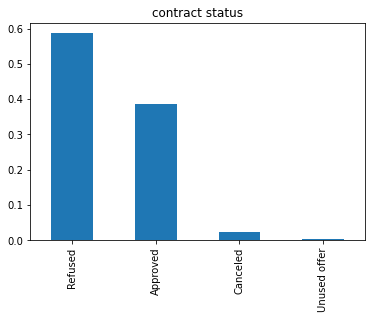

In [69]:
#plot of contract status
prev_app.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("contract status")
plt.show()

no of refused contracts are more than approved.

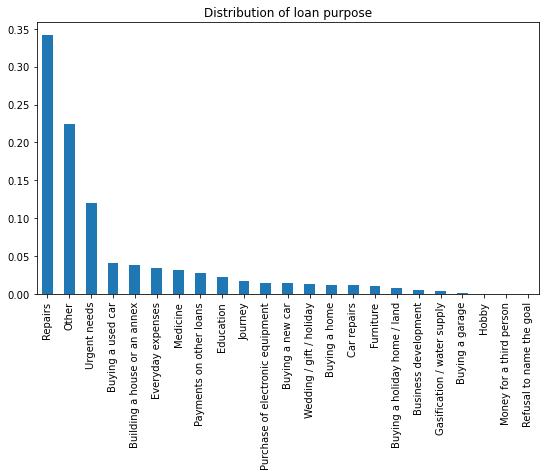

In [60]:
#plot for purpose of loan taken
plt.figure(figsize=(9,5))
                   
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of loan purpose")
plt.show()

loans were applied more for repairs, urgent needs, others, where as least for money for the third person, hobby, and refusal to name the goal 

mergering both data sets 


In [61]:
#merging both the data sets

mer=pd.merge(application, prev_app, how="inner", on="SK_ID_CURR")
mer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [62]:
#check the info
mer.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   SK_ID_CURR                    51420 non-null  int64   
 1   TARGET                        51420 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          51420 non-null  object  
 3   CODE_GENDER                   51420 non-null  object  
 4   FLAG_OWN_CAR                  51420 non-null  object  
 5   FLAG_OWN_REALTY               51420 non-null  object  
 6   CNT_CHILDREN                  51420 non-null  int64   
 7   AMT_INCOME_TOTAL              51420 non-null  float64 
 8   AMT_CREDIT_x                  51420 non-null  float64 
 9   AMT_ANNUITY                   51420 non-null  float64 
 10  NAME_INCOME_TYPE              51420 non-null  object  
 11  NAME_EDUCATION_TYPE           51420 non-null  object  
 12  NAME_FAMILY_STATUS            51420 non-null  

univariate analysis


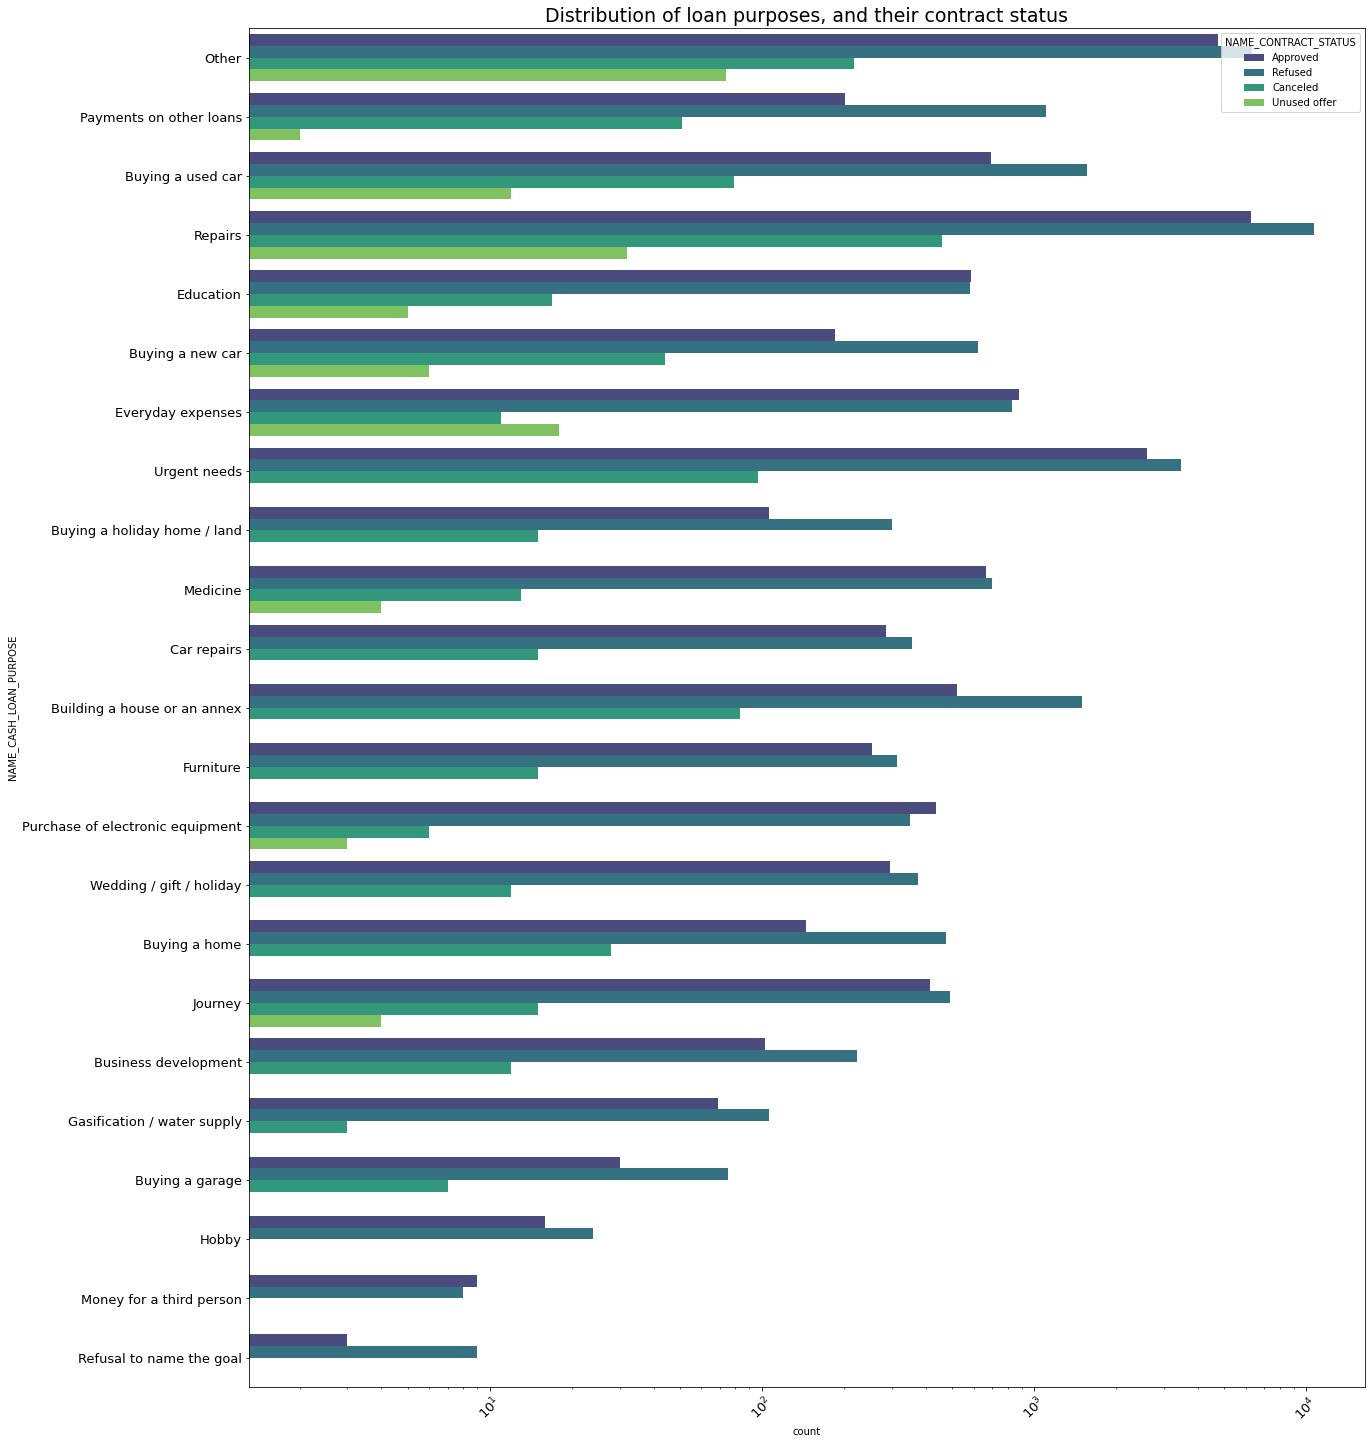

In [63]:
#analysis to see the purpose of loan , and its contract status
plt.figure(figsize=(20,25))

plt.title("Distribution of loan purposes, and their contract status", size=19)
plt.xticks(size=13, rotation=45)
plt.xscale("log")
plt.yticks(size=13)

sns.countplot(data=mer, y="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS", palette="viridis")

plt.show()

loans were applied more for repairs, urgent needs, others, where as least for money for the third person, hobby, and refusal to name the goal.
out of which repairs had the most refusals, others have almost same approvals and refusals.

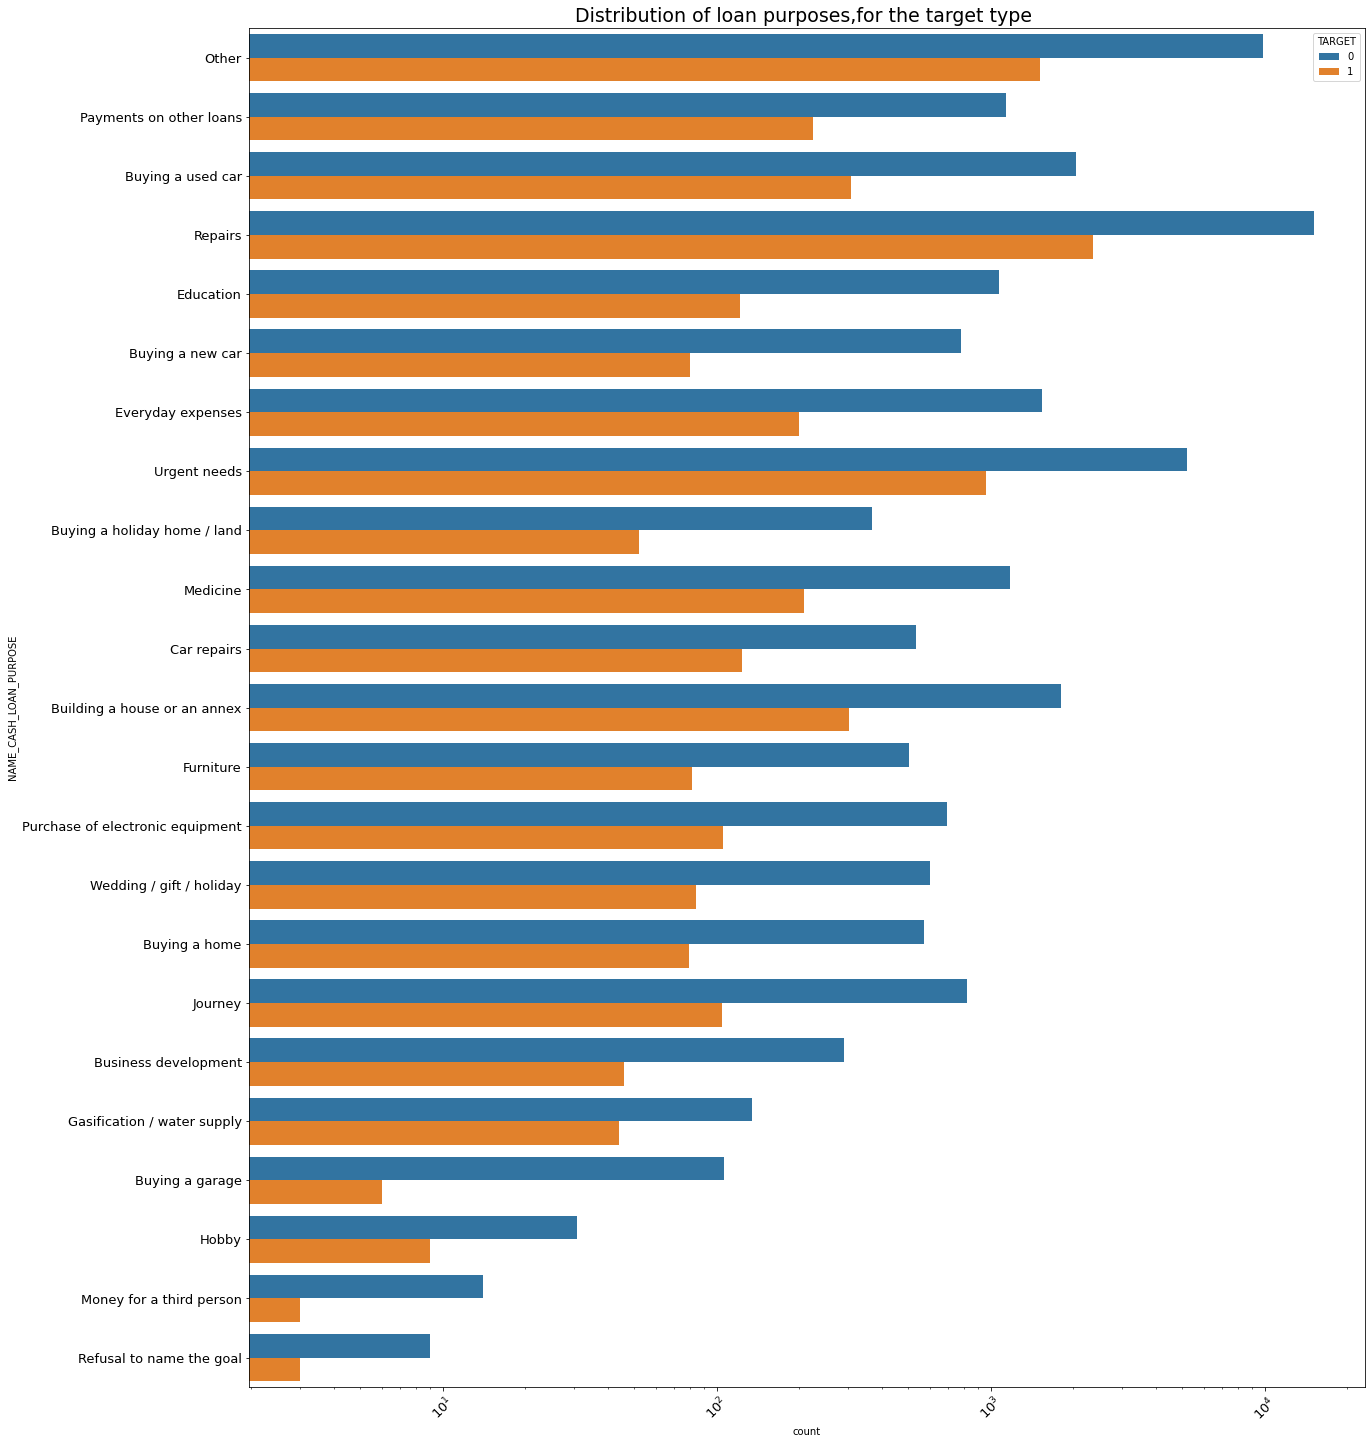

In [64]:
#analysis to see the loan purpose vs target types
plt.figure(figsize=(20,25))

plt.title("Distribution of loan purposes,for the target type ", size=19)
plt.xticks(size=13, rotation=45)
plt.xscale("log")
plt.yticks(size=13)

sns.countplot(data=mer, y="NAME_CASH_LOAN_PURPOSE",hue="TARGET")

plt.show()

we can see that repairs, others and urgent needs have more defaulters

Bivariate analysis for merged data

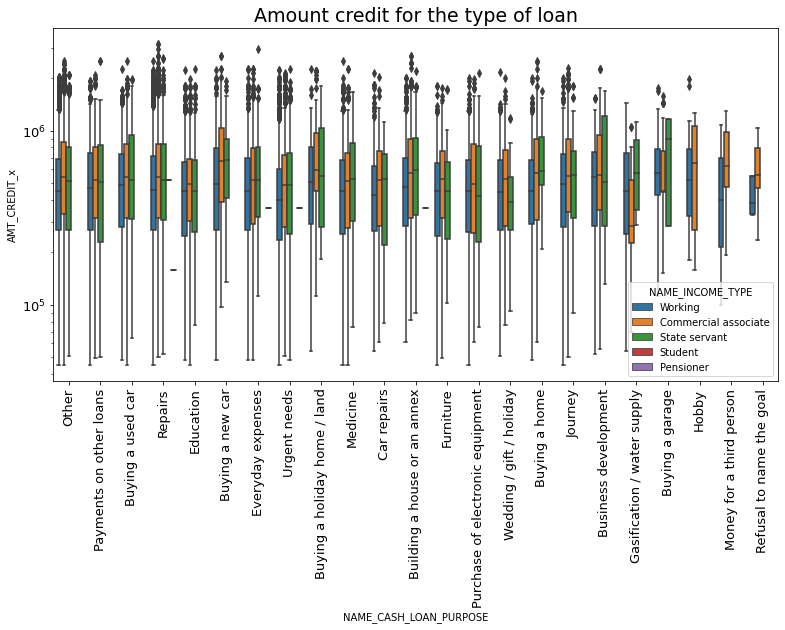

In [65]:
plt.figure(figsize=(13,6.5))

plt.title("Amount credit for the type of loan", size=19)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.yscale("log")
sns.boxplot(data=mer, y="AMT_CREDIT_x",x="NAME_CASH_LOAN_PURPOSE",hue="NAME_INCOME_TYPE", orient="v")
plt.show()

we can infer that mostly for buisness development and buying house the credit is more and out of which state servents take more credits. students and pensioners are least.

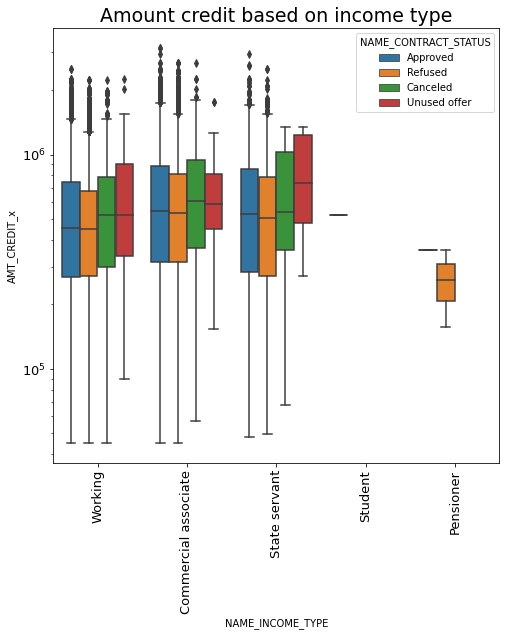

In [66]:
plt.figure(figsize=(8,8))

plt.title("Amount credit based on income type", size=19)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.yscale("log")
sns.boxplot(data=mer, y="AMT_CREDIT_x",x="NAME_INCOME_TYPE",hue="NAME_CONTRACT_STATUS", orient="v")
plt.show()

most of the approval were done for working, commerical and state servents, none for students and pensioners.

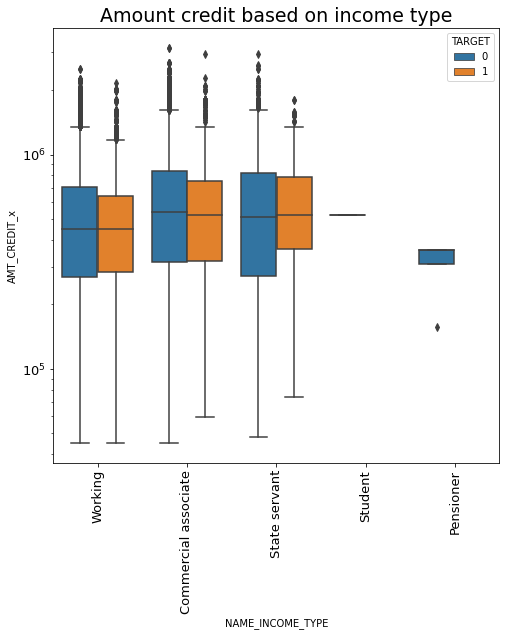

In [67]:
plt.figure(figsize=(8,8))

plt.title("Amount credit based on income type", size=19)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.yscale("log")
sns.boxplot(data=mer, y="AMT_CREDIT_x",x="NAME_INCOME_TYPE",hue="TARGET", orient="v")
plt.show()

commerical and state servents, have more credit for target 1 

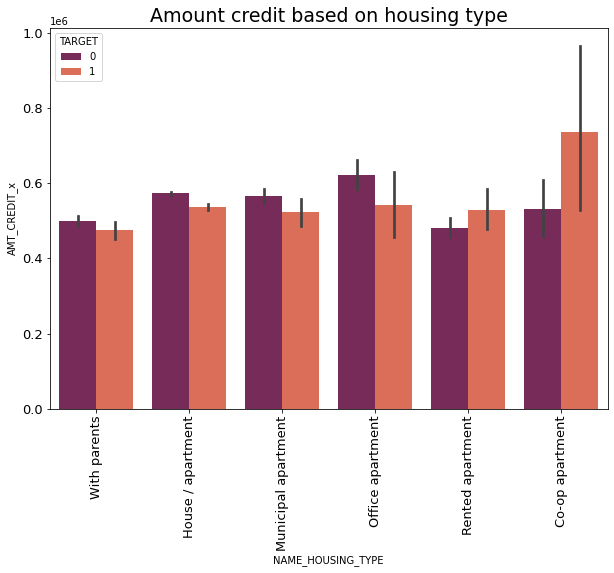

In [68]:
plt.figure(figsize=(10,7))

plt.title("Amount credit based on housing type", size=19)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
#plt.yscale("log")
sns.barplot(data=mer, y="AMT_CREDIT_x",x="NAME_HOUSING_TYPE",hue="TARGET" ,palette="rocket")
plt.show()

for housing type office have more credit, where as co-operates have more defaults in payments

Banks should start considering students and business man to give credit 
Credits for repairs have maximum defaults so banks should stop giving them credit 
Give more credits to with parents, office apartments, house and municipal apartments.
Banks can focus on giving more credit to buying garage , buying home , buying new cars, buying land, education, more credits as these entities are having less defaulters.
